<img src="header.png" align="left"/>

# Anwendungsbeispiel Classification IRIS Flowers


Das Ziel des Beispieles ist es, die Gattung einer Iris Blume anhand von 4 Messgrößen zu schätzen. Dazu verwenden wir 
verschiedene Klassifikationsmethoden.
Wir verwenden einen Datensatz von Edgar Anderson oder R. Fischer aus dem Jahr 1936 [1][2]. Der Datensatz enthält 150 Samples mit jeweils
4 Messwerten petal length, petal width, sepal length, sepal width als Features sowie der korrekten Klasse als Label. 

```
[1] Edgar Anderson (1936). "The species problem in Iris". Annals of the Missouri Botanical Garden. 23 (3): 457–509. doi:10.2307/2394164. JSTOR 2394164.
[2] R. A. Fisher, “The use of multiple measurements in taxonomic problems,” Ann. Eugen., vol. 7, no. 2, pp. 179–188, 1936.
```

In [91]:
#
# Import der Module
#
import pandas
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [92]:
# 
# Laden der Daten
# 
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pandas.read_csv('data/iris/iris.csv', names=names)

In [95]:
#
# Anzeige von Samples
#
print(df.head())

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [98]:
#
# Prüfen der Verteilung der Klassen
#
print(df.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [99]:
# 
# Aufteilen in Training Daten und Testdaten
#
array = df.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.40
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=42)

In [100]:
#
# Trainieren eines einfachen classifiers der kNN Methode
#

knn_classifier = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [101]:
#
# Schätzung und Prüfung der Qualität
#
predictions = knn_classifier.predict(X_validation)
print('Accuracy: {}'.format(accuracy_score(Y_validation, predictions)))

Accuracy: 0.9833333333333333


In [102]:
#
# Einfache confusion Matrix anzeigen
#
print(confusion_matrix(Y_validation, predictions))

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


In [103]:
#
# Test eines decission tree classifiers
#
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, Y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [104]:
#
# Schätzung und Prüfung der Qualität
#
predictions = tree_classifier.predict(X_validation)
print('Accuracy: {}'.format(accuracy_score(Y_validation, predictions)))

Accuracy: 0.9666666666666667


In [106]:
#
# Test einer Reihe von Modellen gleichzeitig
#
scoring = 'accuracy'

# Modelle anlegen
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Testen mit mehreren unterschiedlichen Aufteilungen der Daten
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=20, random_state=42,shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("Modell {}: accuracy {:.3f} (deviation {:.3f})".format(name, cv_results.mean(), cv_results.std()))



Modell KNN: accuracy 0.920 (deviation 0.127)
Modell CART: accuracy 0.910 (deviation 0.143)
Modell NB: accuracy 0.935 (deviation 0.118)
Modell SVM: accuracy 0.932 (deviation 0.122)


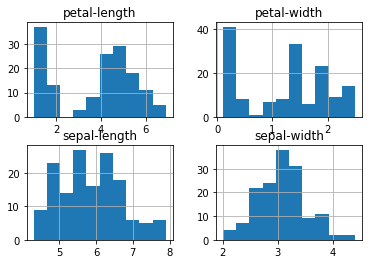

In [107]:
#
# Analyse der Verteilung der Werte in den Features
#
df.hist()
plt.show()

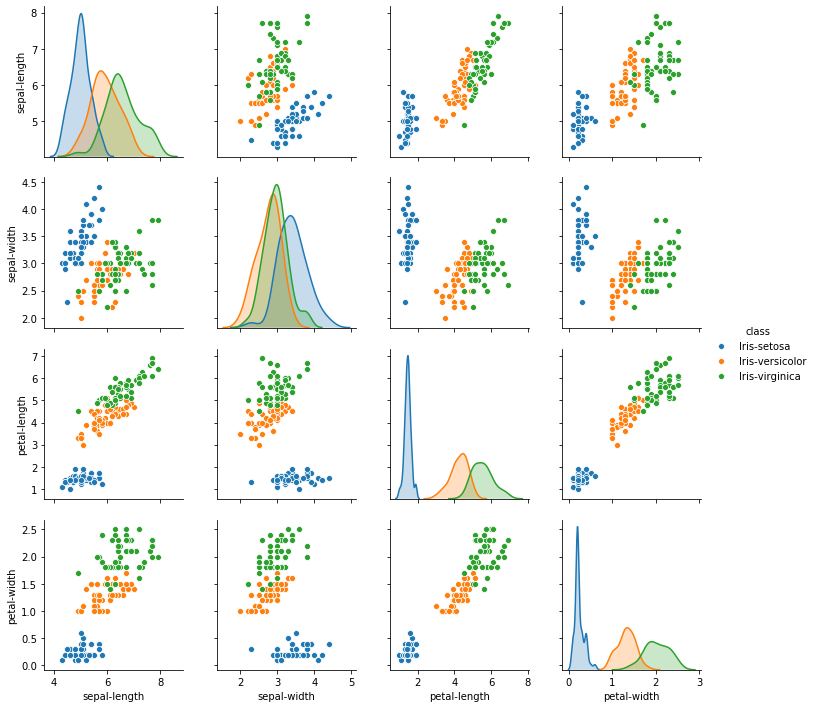

In [108]:
#
# Analyse der Verteilung der Features in Bezug auf die Klassenzuordnung
#
sns.pairplot(df, hue='class')